__Main Steps you will go through:__ 
1. Look at the big picture
2. Get the data.
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model.  
7. Present your solution. 
8. Launch, monitor and maintain your system. 

# 1. Look at the Big Picture: 
Build a model of housing prices in California using the California census data.    

This dta has metrics such as the population, median income, median housing price, and so on for each block group in California.   

( A block group typically has 600 - 3,000 people. ) -districts for short.    

Aim: To train a model on this data so as to predict the median hosuing price in any district, given all other metrics.  


- ### Frame the Problem:  

- __How does the company expect to use/ benefit from the model? __
- This is important to know as:
    - determines how you frame the problem
    - which algorithm you use
    - how much time you spent in tweaking it
    
- The model's output (a prediction of a district's median housing price) will be fed to another Machine Learning system, along with many other signals.  
    (_A piece of information fed to a Machine Learning systems is often called a signal, in referecne to Shanno's information theory: You want high signal/noise ratio._)  
    This downstream information will determine whether it is worth investing in a given area or not. Getting this right is critical as it directly affects revenue.   
    So, in the end, we are going to do an Investment Analysis using the district prices, and other signals. 

__Side Note:__
> __Data Pipeline: __
- A sequence of data processing components is called a data pipeline. 
- Components typically run asynchronously(_of or requiring a form of computer control timing protocol in which a specific operation begins upon receipt of an indication (signal) that the preceding operation has been completed._).
- Each component pull in a large ammount of data, processes it, and spits out the result in another data store, and then some time layer, the next component in the pipeline pulls this data and spits out its own ouput, and so on.   
- data flow graph used. 
- makes architecture robust as if a component breaks down, the downstream components can continue run using the last output from the broken component.  
- broken component might get unnoticed.  

- __ How do you currently solve the problem? __ 
    - prediction of median housing prices is done by experts, which is not really accurate. 
    
- __What kind of ML problem is this? __
    - __SL , USL , , S-SL , RL?__ 
        - labeled training examples 
        - regression task , more specifically, it is a multivariate regression task. 
    - __ Batch or Online learning? __
        - No continuous flow of data
        - No rapidly changing data
        - Dataset is sufficiently small to fit in memory
        - So plain batch learning should do just fine
    - __ Instance based or Model based learning? __ 
        - [DOUBT](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46)
        - Model Based! We do not have so much computing power to use all the housing data for each prediction. Its better to create a model and use that model to predict housing prices. 

# 2.  Select a Performance Measure:   

####  Root Mean Squared Error: 
# $ RMSE(X,h) = \sqrt{\frac{1}{m}\sum_{i=1}^m (h{(x)^{(i)} - y^{(i)})^2}} $  

- `m` is the number of training examples / instances in the dataset. 
- $ x^i $ is the feature column vector / vector of feature values for the $ i^{th} $ training example. 
- $ y^i $ is the the label of the $ i^{th} $ trainiing example. 
- __`X`__ is a matrix containing all the feature values ( excluding labels) of all instances in the dataset. There is one row per instance, and the $ i^{th} $ row is equal to the transpose of $ x^i $, noted $ (x^i)^T $.  
Basically, this means that `X` is a $ m \times n+1 $ matrix, where n is the number of features.  
And $ x^i $  is a $ n + 1 \times 1 $ column vector.  

- $ h(x)^i = \hat{y} $ , that is the prediction we are making. 
- Finally, __RMSE(X,h)__ is the cost function measure on the set of examples using your hypothesis `h`. 

- The RMSE is more sensitive to outliers than the MAE. In other words, it will give you large error for a very large error, and will give you a very small error for a comparitively ok error. But when the outliers are exponentially rare, like in a bell shaped curve, the RMSE performs very well and is generally preffered. 

#### Mean Absolute Error: 
# $ MAE(X,h) =  \frac{1}{m}\sum_{i=1}^m |(h{(x)^{(i)} - y^{(i)})|} $ 

- __[Differences between MAE and RMSE](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d):__ 
    - RMSE gives a relatively higher weight to larger errors. i.e Penalizes the outliers more than the MAE. 
    - RMSE is more useful when large erros are particularly undesirable. 
- __Similarities:__ 
    - Both express average model prediction error. 
    - Both can range from 0 to $\infty $ and are indifferent to the direction of the error. 
    - They are negatively oriented scores, which means lower the MAE / RMSE, the better. 
- __Conclusion:__ 
     - If being off by 10 is more than twice as bad as being off by 5, then RMSE is appropriate. 
     - But if being off by 10 is equally twice as bad as being off by 5, then MAE is appropriate. 
     - RMSE avoids taking absolute values, which is undersirable in many mathematical calculation (not discused) 
     

# 3. Check the Assumptions: 

- Make sure that the data is up to date. 
- Make sure the data is representative of the problem you want to solve. 
- Make sure that your company needs the exact prices and not just a category like "cheap", "medium" , "expensive", otherwise it would turn into a classification task. 


# 4. Setup: 

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports: 
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

# Setting some default matplotlib parameters:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures? 
PROJECT_ROOT_DIR = "."
# Current Directory 
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images",
                       CHAPTER_ID, fig_id+".png")
    # >> file path wherein to save the image
    print("Saving figure ",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = "png", dpi = 300)
    # Using pyplot's savefig function. 

Saving figure  checking_save_fig_function


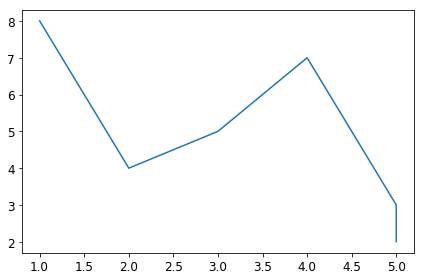

In [2]:
x = [1,2,3,4,5,5]
y = [8,4,5,7,3,2]
checking_save_fig_function = plt.plot(x,y)

save_fig('checking_save_fig_function')
# >> Works. 

# 5. Get the Data / Download the Data:   
- Get your credentials and access authorizations.
- You might also need to check legal constrainsts, such as private fields that should never be copied to unsafe datastores. 
- Familiarize yourself with the data schema (_ a representation of a plan or theory in the form of an outline or model)_: Basically tells you what information each column/index gives you.  
- Preferable to create a small function to download the data ( in case the date changes rapidly, and you want to run a small script anytime to get the latest data or in case you need to install the dataset on multiple machines). 

In [3]:
from IPython.display import FileLink, FileLinks

> ###  __ i) . Downloading and extracting the data__

__Module Notes:__
- [tarfile](https://www.scribd.com/document/521235/Python-Tutorial-tarfile-module)
- [urllib](https://www.youtube.com/watch?v=5GzVNi0oTxQ)


In [4]:
import os 
import tarfile 
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL,
                      housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        # If the housing_path directory is not
        # an existing directory, make the directory,
        # /datasets/housing
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    # >> /datasets/housing/housing.tgz
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    # >> urllib.request.urlretrieve(url
    # >> [, filename[, reporthook[, data]]])
    # Here, url = housing_url
    # This function copies a network object or a local
    # file, here the network object is given by
    # housing_url, and the local file is given by 
    # tgz.path
    # >> Bsically, from github repository, datasets/housing/
    # housing.tgz, it retrieves: datasets/housing/housing.tgz
    
    housing_tgz = tarfile.open(tgz_path)
    # >> Creating a tarfile object in the tgz_path
    
    housing_tgz.extractall(path = housing_path)
    # >> Extracting all object in the tarfile to the 
    # housing_path = /datasets/housing/
    # Place the file housing.csv in the folder:
    # /datasets/housing
    
    housing_tgz.close()
    # >> Closing the tarfile object

In [5]:
fetch_housing_data()

> ### __ii). Convert the csv into a pandas dataframe object__

In [6]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    """Returns a Pandas DataFrame object containing
    all the data."""
    csv_path = os.path.join(housing_path, "housing.csv")
    # >> /datasets/housing/housig.csv
    return pd.read_csv(csv_path)

> ### __ iii). Take a look at the housing data:__

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


> ### __ iv). Get information about the dataset __: 

`pd.DataFrame.info() `: The `info` method is useful to get a quick description of the data, in partifular the toal number of rows, and each attributes' type and number of non-null values. 

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- This data has (20 thousand 640) rows, where each row represents one district. 
- Out of these 10 columns, only 9 represent features. 
- `total_bedrooms` attribute has only $ 20,433 $ non- null values, meaning that $ 207 $ districts are missing this feature. We will need to take care of this later. 

> ### v) Use `value_counts` and `describe` to view summary of each attribute. 

- All attributes are numerical except for the `ocean_proximity` field. 
    - It is a categorical attribute. 
    - You can find out what categories exist and how many districts belong to each category by using the [value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method on the particular `ocean_proximity` column. 
    It returns object containing the counts of each unique  value. 

In [9]:
housing["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- The [describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method shows a summary of the numerical attributes, for each column. 

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Note: The null values are ignored (`count` of `total_bedrooms` is 20,433, not 20,640.) 

> ### __v). Plot histogram for each numerical attribute__ 

- A histogram shows the number of instances(frquency  on the vertical axis), that have a given value range(on the horizontal axis), whether that value range may be in age, USD, meters, or just a number. 
- Note that you will only get histograms for the columns with numerical values. 
- Using the `hist()` function on the entire dataframe object helps in plotting a histogram for each of the numerical attributes. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1193d1438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116c95080>]], dtype=object)

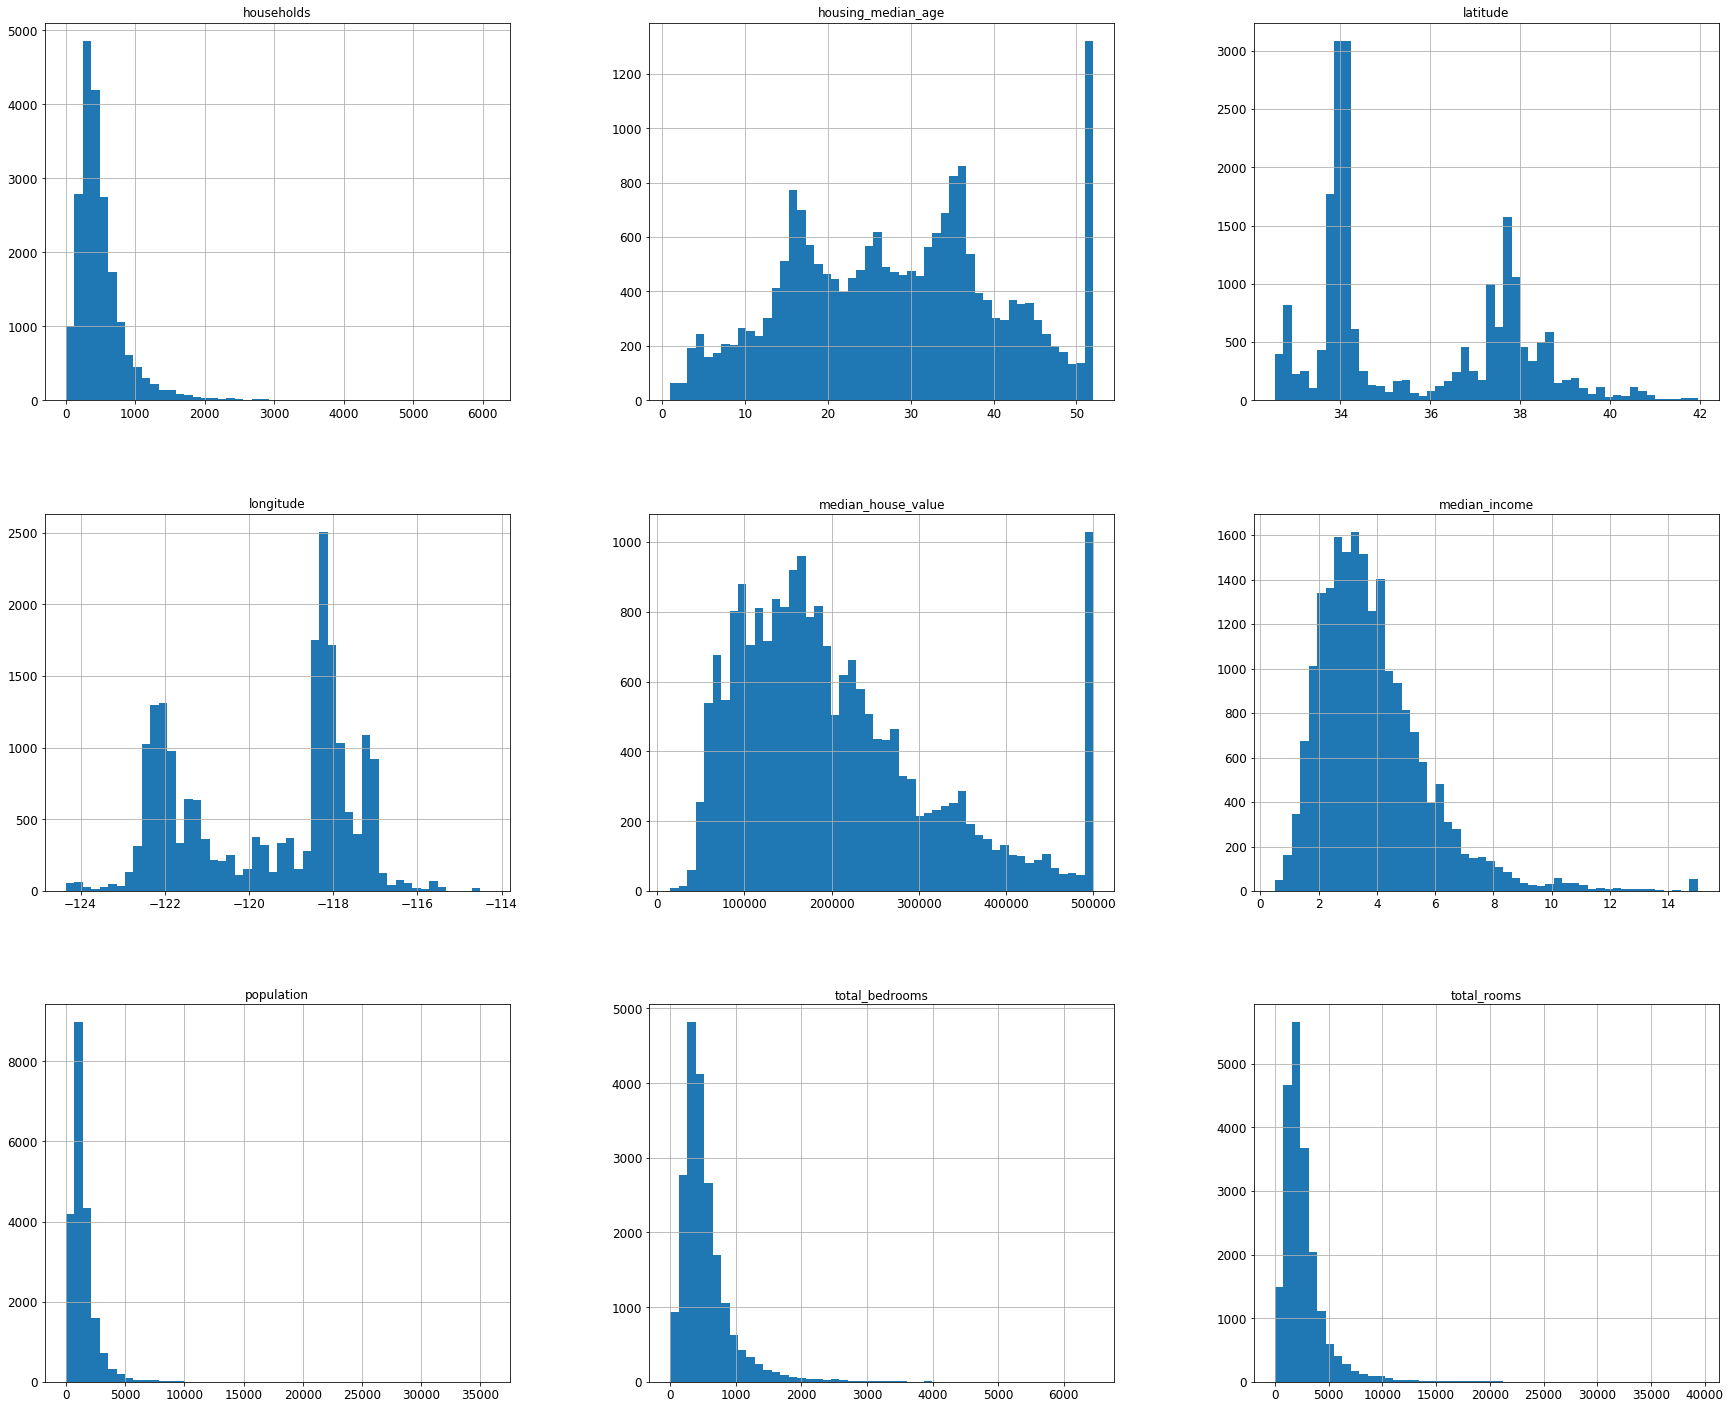

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (30,25))

__Side Note:__ The `hist()` method relies on Matplotlib, which in turn relies on a use-specific graphical backend to draw on your screen.  
So, before you plot anything, always specify which backend Matplolib should use. Here, in jupyter, the magic commmand `%matplotlib inline` tells Matplotlib to use Jupyter's backend to plot graphs.  

__Things to notice:__  

I. Median Income attribute does not seem like it is expresed in USD. The income data has been scaled to lie between 0.5 ( for lower median incomes ) and 15 (for higher median incomes).    
- Working with preprocessed attributes is common in machine learning, and it is not necessarily a problem but you should try to understand how the data was computed.      


II. The `housing median age`, and the `median house value` were also capped.   
In other words, if the `median house age` of a district is beyond 52, it's recorded  as 52.   
Or, if the `median house value` of a district is beyond 500,000 , it's recorded as 500,000  .

- This may be a big problem. You Machine Learning algorithm will think that houses never go beyond a certain `age`, or certain `median value`.
- DOUBT: If given a house with age above 52, will the algorithm that is trained be able to make use/sense of it? Will the algorithm just ignore it? Or, will it use it? If yes, how? 
- If you do need precise predictions beyond 500,000 , you have mainly 2 options: 
    - a)  Collect proper labels for the districts whose labels were capped.  
    - b) Remove those district from the training and test set, as your system should not be evaluated poorly if it predicts value beyond $500,000 .    
    
    
III. These attributes have very different scales. 
- `feature scaling`.   


IV. Finally, many histograms are `tail heavy`: They extend much farther to the right of the median that to the left. We will try and transform these attributes later on to have more bell shaped distributions.  
__DOUBT__: If a feature's distribution is tail heavy, why is does it make it difficult for the ML algo ? 


,0,1
20046,1.6812,0.519508


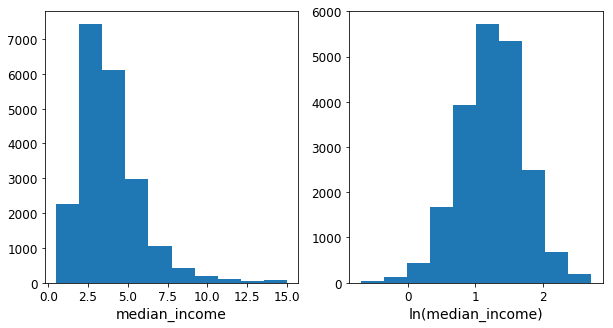

In [12]:
plt.figure(figsize = (10,5))
plt.subplot(121)
t_b = housing["median_income"]
plt.hist(t_b)
plt.xlabel("median_income")
plt.subplot(122)
log_t_b = np.log(housing["median_income"])
plt.hist(log_t_b)
plt.xlabel("ln(median_income)")
pd.DataFrame(np.c_[t_b, log_t_b]).sample()

In [99]:
plt.hist(housing["median_house_value"],bins = 50)

KeyError: 'median_house_value'

(array([   49.,    51.,   150.,   188.,   131.,   139.,   166.,   163.,
          212.,   210.,   195.,   240.,   318.,   401.,   626.,   562.,
          446.,   408.,   374.,   365.,   319.,   346.,   367.,   458.,
          491.,   385.,   383.,   362.,   387.,   376.,   449.,   504.,
          557.,   667.,   696.,   422.,   319.,   295.,   241.,   245.,
          296.,   289.,   268.,   238.,   180.,   152.,   146.,   108.,
          106.,  1066.]),
 array([  1.  ,   2.02,   3.04,   4.06,   5.08,   6.1 ,   7.12,   8.14,
          9.16,  10.18,  11.2 ,  12.22,  13.24,  14.26,  15.28,  16.3 ,
         17.32,  18.34,  19.36,  20.38,  21.4 ,  22.42,  23.44,  24.46,
         25.48,  26.5 ,  27.52,  28.54,  29.56,  30.58,  31.6 ,  32.62,
         33.64,  34.66,  35.68,  36.7 ,  37.72,  38.74,  39.76,  40.78,
         41.8 ,  42.82,  43.84,  44.86,  45.88,  46.9 ,  47.92,  48.94,
         49.96,  50.98,  52.  ]),
 <a list of 50 Patch objects>)

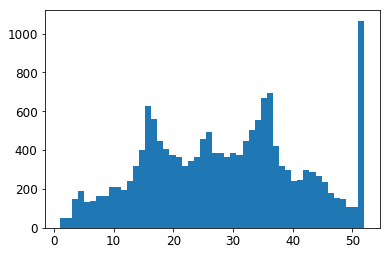

In [98]:
plt.hist(housing["housing_median_age"], bins=50)

(array([  877.,  3612.,  4099.,  3771.,  2799.,  1769.,  1239.,   752.,
          479.,  1243.]),
 array([  14999. ,   63499.2,  111999.4,  160499.6,  208999.8,  257500. ,
         306000.2,  354500.4,  403000.6,  451500.8,  500001. ]),
 <a list of 10 Patch objects>)

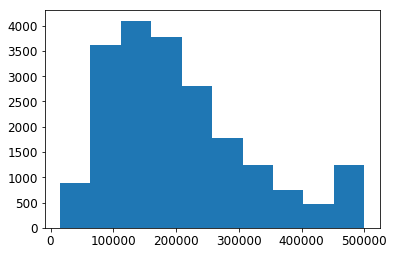

In [15]:
plt.hist(housing["median_house_value"])

## Warning: 
Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it. 


# 6. Create the Test Set__  

- __Data Snooping Bias:__
    - Why create the test set now without knowing much about the data? 
        - Brain is amazing pattern detection system, which means it is prone to overfitting.  
        You may stumble upon some interesting pattern in the training data, which makes you choose a certain Machine Learning model.   
        So, when you estimate your generalization error, you will get a good result , optimistic in fact. But it will not perform as well as expected with new data ( not part of training data). 

- __Module Notes: __  
[np.random.permutation(x)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html)  
    - Randomly permute a sequence, or return a permuted range.  
    If x is a multi-dimensional array, it is only shuffled along its first index (Row wise).  

__ Function for creating train_test_splits using only numpy: __

In [16]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    # >> returns shuffled indices for the input training
    # data
    
    test_set_size = int(len(data) * test_ratio)
    # >> Setting the size of the test set to the 
    # proportion of the original data. 
    
    test_indices = shuffled_indices[:test_set_size]
    # >> first (test_set_size) indices in shuffled_indices
    
    train_indices = shuffled_indices[test_set_size:]
    # >> indices remaining after taking test indices
    # from shuffled_indices
    
    return data.iloc[train_indices]. data.iloc[test_indices]    

- make sure you set numpy's random number generator's seed befor you use `np.random.permutation` as it will give different `shuffled_indices` every time you run the function.   
This will make your model see the test set, the next time you train it. You don't want that! 

- You can also save the test set on the first run, and load that in the subsequent runs.  

- __ PROBLEM: __  Both of these solution will break if you fetch an updated dataset.  Which will mean, you no longer will be dealing with the same indices you were dealing with before. That means you will not be having the same train/test data as before.  They will overlap! 
    - For example, let's say you had 10 instances in you data, then you would have 8:2 split right? The first 2 instances in the shuffled indices will go to the test set. But then, if you updata the dataset, and then you have 15 instances, then what? Even ig you use the same random seed , you will get test_indices which were previously part of the train_indeces when you had 10 instances. 
- __Solution__: 
    - Use each instance's identifier to decide whther or not it should go in the test set ( assuming instances have a unique and immutable identifier)   
    
    - For example: Compute a hash of each instance's identifier, keep only the last byte (a group of binary digits or bit(usually 8) operated on as a unit) of the hash, and put the instance in the test set if this value is lower or equal to 51 ( i.e 20% of 256).      
    
    This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset.   
    The new test set will contain 20 % of the new instances, but it will not contain any instance that was previously in the training set.  
    

__HASH TABLES:__
https://www.youtube.com/watch?v=h2d9b_nEzoA&t=66s 

__Arrays__: 
- You can index any element in the array. 
- Downside: size is fixed. You tell the operating system to allocate that much memory to the array. 
- Arrays cannot Grow as their elements are contiguous (adjacent to each other) in memory. 

__Linked Lists__: 
- can grow, as their elements are not contiguous in memory. 
- Each node in a linked list contains the element we want to store, followed by a pointer to the subsequent element we want to store. 
- In order to access an element, it is necessary to traverse (travel across) the entire list to reach a certain element. If we want to lookup a certain value, we will go from node to node to see if the value of certain node is the value we are looking for. 
- In such a case, lookup is O(n). O(n) is Big O Notation and refers to the complexity of a given algorithm. n here, refers to the size of the input, in your case it's the number of items in your list. O(n) means that your algorithm will take on the order of n operations to insert/find an item.    

__Can we do better than O(n) while still allowing our data structure to grow over time?__ 

__Hash Tables:__
- speedy insertion, deletion, and lookup. 

- __Q. What is a hash function?__
    - A hash table is just an array, coupled with a function (hash function).  
    - The hash function takes in an input, "key" , and outputs an integer, commonly reffered to as a "hash value".
    - The hash value maps our input/key to a particular index in the hash table. 
    - Initially, You can use the hash function, to know where in the hash table should you store a given key. 
    - Later, you can use the same hash function to know where in the hash table should you search for a given key. 
    - For this reason, it is important that the hash function is consistent, and outputs the same hash value for a certain key. 
    - Hash Tables can be used to store data of all values. 
    - Collision: The result of 2 keys hashing to the same index. Soltuions? 
        - Linear Probing: 
        If there is a collision, the key is assigned the next available slot in the index. 
            - Drawback: Clustering: As one collision occurs, another one will occur cause the first collision will lead to a key taking the slot of another future key.  
            - This brings us back to insertion, deletion and lookup devolving to O(n).
        - Seperate Chaining Model: 
             - This involves using a series of linked list at a certain index. So, when you get "ant" and it hashes to 0, it is just linked to the next linked list in front of 0. 
             - Makes worst lookup time to O(n/k) where n is the number elements in your hash table and k is the size of the hash table. 
         - Resolving colisions involves one form of linear search or another, which slows things down. 
         - Use a hash function that minimizes the chance of collisions in the first place. 
    - Properties of Good Hash Functions: 
        - Make use of all information provided by a certain key. 
        eg: cat, and catterpillar 
        - It should uniformly distribute output evenly across table. This will reduce the length of linked list. 
        - Maps similar keys to very different hash values. 
        
https://docs.python.org/2/library/functions.html#hash
https://www.youtube.com/watch?v=dG3tOsGEYP4 
http://www.bogotobogo.com/python/python_hash_tables_hashing_dictionary_associated_arrays.php

__ Hashing from 2 arrays: __
```python
keys = ['a', 'b', 'c'] 
values = [1, 2, 3]
hash = {
    k:v for k,v in zip(keys, values)
}
hash
# >> {'a': 1, 'c':3, 'b': 2}

'''Examples of built-in hash function:'''
map(hash, [0, 1, 2, 3])
# >> [0, 1, 2, 3] 

map(hash, ['0', '1', '2', '3']) 
# >> [6144018481, 6272018864, 6400019251, 6528019634] 
```
Python uses different hash() functions depening on the type of data. 

```python

import hashlib
print(hashlib.md5('a'.encode('utf-8')))
# >> Creates a hash object
# >> <md5 HASH object @ 0x111113940>

print(hashlib.md5('a'.encode('utf-8')).hexdigest())
# >> 0cc175b9c0f1b6a831c399e269772661
```

This example uses the hexdigest() method instead of digest() because the output is formatted to be printed.  
If a binary digest value is acceptable, you can use digest().

```python 
print(hashlib.md5('a'.encode('utf-8')).digest())
# >> Gives the hash value 
# >> b'\x0c\xc1u\xb9\xc0\xf1\xb6\xa81\xc3\x99\xe2iw&a'
```

In [17]:
import hashlib 

hash(4.235)
# >> 541873107165218820  

hash(np.int64(4.235))
# >> 4 

# hash(np.int64(4.235).encode('utf-8')).digest()
# # >> AttributeError: 'int' object has no attribute 'digest'

"""print(hash(np.int64(4)).digest()[-1] < 256*test_ratio)"""
# >> AttributeError: 'int' object has no attribute 'digest

'print(hash(np.int64(4)).digest()[-1] < 256*test_ratio)'

In [18]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    """
    - Compute a hash of each instance's identifier, 
    keep only the last byte (a group of binary digits
    or bit(usually 8) operated on as a unit) 
    of the hash, and put the instance in the test set
    if this value is lower or equal to 51 
    ( i.e 20% of 256). 
    """
    # DOUBT: 1. WHY are we using 256? 
    # I searched but have not understood the relation
    # DOUBT: 2. AttributeError: 'int' object has no attribute 'digest'
    # DOUBT 3. 'keeping only the last byte', isn't a byte
    # 8 digit, won't that always be bigger than 51? 
    # I'm sorry, though i have done IPND, i don;t know
    # what all of this means? 
    #  The new test set will contain 20% of the new instances,
    # but it will not contain any instance that was previously
    # in the training set. HOW? 
    # Q. Please summarise what is being computed here. 
    
#     print("hash(np.int64(identifier)).digest()[-1] < 256*test_ratio")
#     print(hash(np.int64(identifier)).digest()[-1] < 256*test_ratio)
    return hash(np.int64(identifier)).digest()[-1] < 256*test_ratio


def split_train_test_by_id(data, test_ratio, 
                          id_column, hash = hashlib.md5):
    ids = data[id_column]
    # >> Returns a series, with indexes (or ids)
#     print('\n\nids:', ids)
    
    in_test_set = ids.apply(lambda id_:test_set_check(id_, test_ratio, hash))
    # >> Applies the function test_set_check to the 
    # entire ids column. 
    # This will return a boolean array, which will
    # tell this information about each id/ index:
    # Is it in the test set? Or not. 
#     print("\n\nin_test_set: ", in_test_set)
    
    return data.loc[~in_test_set], data.loc[in_test_set]
    # >> data.loc[~in_test_set] refers to the training
    # set
    # >> data.loc[in_test_set] refers to the test 
    # set. 

    

Unfortunately, the hosuing dataset does not have an identifier column.  
The simplest solution is to use the row index as the ID. 

- [pd.DataFrame.reset_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)
    - adds an `'index'` column to the data. 

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
housing_with_id = housing.reset_index()
# adds an index column 
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
train_set, test_set = split_train_test_by_id(housing_with_id, 
                                            0.2,
                                            "index")


__Summary of what `split_train_test_by_id` and `test_check_split` does__: 

1. Extracts the ids, which is basically, just a series with the indexs of the `housing_with_id` data.  
```
ids: 0            0
1            1
2            2
....
...
20637    20637
20638    20638
20639    20639
```  

2. Returns a boolean array telling whether or not an index is in the test set or not, using the `test_check_set() function`. 
```
in_test_set: 
0        False
1        False
2        False
3        False
4         True
...
20638    False
20639    False
Name: index, Length: 20640, dtype: bool
```  

3. Using boolean indexing, splits the test and training sets. 

__DOUBT:__ I understand what `split_train_test_by_id` does, but i do not understand what `test_check_set()` does. 


__Note:__ 
- If you use the row index as a unique identifier, you need to make sure that the new data gets appended to the end of the dataset, and no row ever gets deleted.   
- If this is not possible, then you can try to use the most stable features possible. For example: The latitude and logitude of a certain distrct are stable for the next few million years, so you could combine then to get an ID: 

```python
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
```                                            

__Using sklearn's `train_test_split` function:__
- Perfroms the same a `split_train_test` defined earlier: 
```python 
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices]. data.iloc[test_indices] 
```
- Note that you can pass it multiple datasets with identical number of rows and it will split them on the same indices, if it gets the same `random_state`. 


In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, 
                                      test_size = 0.2,
                                      random_state = 42)


In [23]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


- Random samping methods are fine if your dataset is large enough ( especially relative to the number of attributes). 
- If not large enough - there may be a `sampling bias`. 
- __Startified Sampling:__ the population is divided into homogenour subgroups called `strata`, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population.   
__DOUBT:__ If they were randomly samples, there would about 12 % chance of sampling a skewed set,with either less than 49% feamle or more than 54% female. How did they arrive at this statistic? 
    - According to me, doing a bunch of random sampling. And then choosing the samples with less than 39% female or more than 54% female. 
- Supoosed `median income` is an important attribute to predict `median housing prices`. You may want to ensure that your test set is representative of the various categories of incomes in the whole dataset. 
    - Since the `median income` is a continuous attribute, you first need to create an income category attribute. 
    - Let's have a look at the median_income data and bar graph. 
    - The data: 
    
```python
housing['median_income']
# 0        8.3252
# 1        8.3014
# 2        7.2574
# ....
# 20637    1.7000
# 20638    1.8672
```

(array([ 2247.,  7436.,  6098.,  2990.,  1060.,   428.,   178.,    93.,
           47.,    63.]),
 array([  0.4999 ,   1.94992,   3.39994,   4.84996,   6.29998,   7.75   ,
          9.20002,  10.65004,  12.10006,  13.55008,  15.0001 ]),
 <a list of 10 Patch objects>)

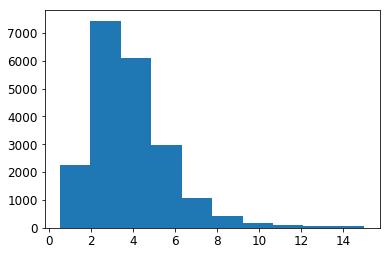

In [24]:
plt.hist(housing['median_income'])

- __Things to notice:__  

- Median Income attribute does not seem like it is expreseen in USD. The income data has been scaled to lie between 0.5 ( for lower median incomes ) and 15 (for higher median incomes).     

- Most median income values are clustered around  20,000 and 50,000, but some median incomes go far beyond 60,00.   

- It is important to have a sufficient number of instances in your dataset for each stratum , or else the stratum's importance may be biased.  

- This means you should not have too many starats, and each stratum should be large enough.  

- The following code creates an income category attribute by 
    - dividing the median income by 1.5 ( to limit the number of income categories),
    - and rouding up using `ceil` (to have discrete categories), 
    - and then merging all the categories greater than 5 into category 5. 

In [25]:
housing["income_cat"] = np.ceil(
    housing["median_income"]/1.5)
# >> Creates a column in housing : "income_cat"
# >> Divides each entry in "median_income" by 1.5.
# >> and then rounds it up using ceil.
"""print(housing[["median_income", "income_cat"]])"""
#        median_income  income_cat
# 0             8.3252  6.0 = (np.ceil(8.3252/1.5))
# 1             8.3014         6.0
# 2             7.2574         5.0
# 3             5.6431         4.0
# .....
# 20636         2.5568         2.0
# 20637         1.7000         2.0
# 20638         1.8672         2.0
# 20639         2.3886         2.0

'print(housing[["median_income", "income_cat"]])'

- [pd.DataFrame.where](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html)

```python
s = pd.Series(range(5))
"""s.where(s > 0)"""
# 0    NaN
# 1    1.0
# 2    2.0
# 3    3.0
# 4    4.0

s.where(cond = s>0, other = 'hello')
# >> The other parameter replaces the entries where NaN is there. 

# 0    hello
# 1        1
# 2        2
# 3        3
# 4        4
# dtype: object
```

In [26]:
# Label those above 5 as 5
housing["income_cat"].where(
    housing["income_cat"]< 5, 5.0, inplace = True) 

#>> This satatement will insert a NaN, wherever 
# there is a value greater than 5, and won't 
# change any value that is less than 5. 
# >> Also, it will replace any NaN value with
# 5.0 

# housing["income_cat"]
# 0        5.0
# 1        5.0
# 2        5.0
# 3        4.0
# 4        3.0
# ...
# 20636    2.0
# 20637    2.0
# 20638    2.0
# 20639    2.0

- __Let's see the data of `housing['income_cat']`. Precisely, how many distrcts fall into each income category? __


In [27]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

- __Let's also check this out graphically__

[0, 5.0, 0, 8000]

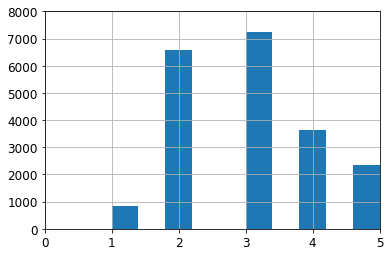

In [28]:
housing["income_cat"].hist()
plt.axis([0,5.0, 0, 8000])

__Things to notice__:  
- More than 7000 districts fall into category 3.0, which seems like the most common income category. 

Now you are ready to a stratified sampling based on the income category.  
For this, you can use `Sklearn's StratifiedShuffleSplit` class:  
>#### [Stratified Shuffle Split  ](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)
- Stratified ShuffleSplit cross-validator. 
- Provides train/test indices to split the data in train/test sets. 
- Parameter:  
    - n_splits: Number of reshuffling and splitting iterations 
    - test_size: 
        - float: between 0 and 1 
        - int: number of test examples
        - default: 0.1 
        - otherwise, complements train size. 
    - train_size: 
        - float: between 0 and 1 
        - int: number of train examples
        - default: 0.1 
        - otherwise, complements test size. 
    - random_state: random state generator seed. 
    
```python
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[1,2],
             [3,4],
             [5,6],
             [7,8]])

y = np.array([0,0,1,1])

sss = StratifiedShuffleSplit(n_splits = 1, 
                             test_size = 0.5,
                            random_state = 0)
sss.get_n_splits(X,y)
# >> Retruns the number of splitting iterations in the cross validator 

print(list(sss.split(X,y)))
# >> Generate indices to split data into training and test set
# [(array([1, 2]), array([3, 0]))]

for train_index, test_index in sss.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# TRAIN: [1 2] TEST: [3 0]
# >> This means, row 1, and row 2 are for the 
# training set
# >> And row 3 and row 0 are for the test set. 

print('X_train\n', X_train)
# >> X_train
#  [[3 4]
#  [5 6]]

print("y_train\n", y_train)
# y_train
#  [0 1]

print("X_test\n", X_test)
# X_test
#  [[7 8]
#  [1 2]]

print("y_test\n", y_test)
# y_test
#  [1 0] 
```
__IF n_splits = 3:__

```python
# TRAIN: [1 2] TEST: [3 0]
# TRAIN: [0 2] TEST: [1 3]
# TRAIN: [0 2] TEST: [3 1]

print('X_train\n', X_train)
# X_train
#  [[1 2]
#  [5 6]]

print("y_train\n", y_train)
# y_train
#  [0 1]

print("X_test\n", X_test)
# X_test
#  [[7 8]
#  [3 4]]

print("y_test\n", y_test)
# y_test
#  [1 0]
```

__ DOUBT: What is the different thing that happens when we use more than 1 n_splits? __
> Maybe, it just chooses the last results from the last iteration.
> It returns a different combination of stratified split. 

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,
                              test_size = 0.2,
                              random_state = 42)

# Printing the indices which will split the data 
# into training and testing sets. 
"""print(list(split.split(housing, housing['median_house_value'])))"""

# >> The least populated class in y has only 1 
# member, which is too few. The minimum number 
# of groups for any class cannot be less than 2.

"""housing["median_house_value"].value_counts() """
# 500001.0    965
# 137500.0    122
# 162500.0    117
# 112500.0    103
# 187500.0     93
# ....
# 347500.0      1
# 487000.0      1
# 331100.0      1
# 303200.0      1
# 307900.0      1
# 383200.0      1
# 360800.0      1
# 405500.0      1

# As you can see, there are 965 districts where the
# median house value is 500,001. 
# But there are many districts whose median house
# value is not the same as any of the districts. 
# For eg: There is a district with median house
# value 405500, which does not match the median
# house value of any other ditrict


'housing["median_house_value"].value_counts() '

Anyway, we do not need to worry about that, as we are not creating stratas according to `median_house_valu`.  
We are creating stratas according to `median_income`.    
Therefore: 
```python
split.split(housing, housing["income_cat"])
```
- Will return 2 arrays: 
    - The first will be a list of indices for the 
training set. 
    - The other will be a list of indices for the 
testing set.  

The code that follows is used to check whether there is any `NaN` value in `income_cat`. If there is, the `split.split(housing, housing["income_cat"])` function will not work. 
- Wil give the following error: 
```python
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').```

In [30]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
income_cat            False
dtype: bool

In [31]:
# Creating Training and Testing Sets: 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let's see if this worked as expected.  
You can start by looking at the income category proportions in the full housing dataset. 


In [32]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

So,: 
- 35% of the districts are in category 3.0 (medium - income) . 
- 31% of the districts are in catefory 2.0 (low-medium income ). 
- 17% of the districts are in category 4.0 (medium -high income). 
- 11% of the districts are in category 5.0 (high income) 
- and 3% of the districts are in category 1.0 (low income).  

- [pd.DataFrame.sort_index](http://localhost:8888/notebooks/Documents/MLND/handson-ml-master/tools_pandas.ipynb), code block 87. 

In [33]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

# Random Sampling
train_set, test_set = train_test_split(housing, 
                                       test_size = 0.2,
                                      random_state = 42)

compare_props = {
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)
}

compare_props = pd.DataFrame(compare_props).sort_index()
# >> .sort_index() will arrange the new dataframe
# by index, in ascending order. 

# We wold like to print how much error is each 
# sampling method doing:

# Taking the absolute % error: 

compare_props["Random Sampling Error %"] = \
100 * np.abs(compare_props["Overall"] - 
       compare_props["Random"]) / compare_props["Overall"]

compare_props["Stratified Sampling Error %"] = \
100 * np.abs(compare_props["Overall"] - 
       compare_props["Stratified"]) / compare_props["Overall"]

compare_props["Stratfied Better By: %"] = \
100 * (compare_props["Random Sampling Error %"] - 
       compare_props["Stratified Sampling Error %"]) / compare_props["Random Sampling Error %"]
# >> +ve if better than random
# >> -ve if worse than random 

compare_props



,Overall,Random,Stratified,Random Sampling Error %,Stratified Sampling Error %,Stratfied Better By: %
1.0,0.039826,0.040213,0.039729,0.973236,0.243309,75.000000
2.0,0.318847,0.324370,0.318798,1.732260,0.015195,99.122807
3.0,0.350581,0.358527,0.350533,2.266446,0.013820,99.390244
4.0,0.176308,0.167393,0.176357,5.056334,0.027480,99.456522
5.0,0.114438,0.109496,0.114583,4.318374,0.127011,97.058824


- Random Sampling clearly makes more error than Stratified Random Sampling.  

Now we should remove the `income_cat` attribute so that the data is back to it's orginal state. 


In [34]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)
# Deletes the income_cat column one by one from
# each set. 

## 4.  Discover and Visualise Your Data: 

> ### i) Visualising the entire training data:  

- Put the test set aside so that you're only exploring the training set. 
- If the training set it too large, you may want to sample an exploration set. 
- Make a copy of the training set, so that you don't harm the training set in any way, using [pd.DataFrame.copy()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.copy.html)
    -  DOUBT: Why do we need the .copy function? If we cannot assign the whole dataframe to a new variable as making changes in the new variable, may cause changes in the old dataframe.. Can't we use indexing?
        - NO, indexing also creates a view of the dataframe, just like in Numpy.

In [35]:
housing = strat_train_set.copy() 

- Using the latitude and longitude information, we can create a scatter plot to see how the districts are distributed. 


Saving figure  bad_visualization_plot


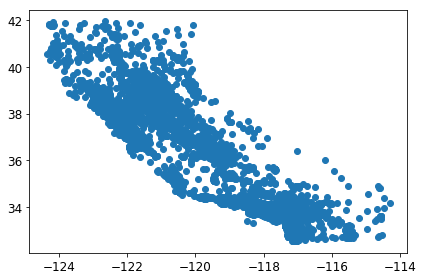

In [36]:
plt.scatter(x = housing["longitude"],
            y= housing["latitude"], 
           )
save_fig("bad_visualization_plot")

That looks like California, but is not quite useful. 
It does not show any trend or pattern in the data. 
If we set the alpha level to 0.1 ( VERY TRANSPARENT), if some spots are still opaque, it would be because there are a number of points(districts) stacked up on each other. 
- This will indicate high population in that area. 

Saving figure  better_visualisations_plot


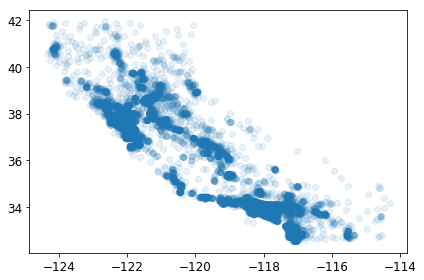

In [37]:
plt.scatter(x = housing["longitude"],
            y= housing["latitude"], 
           alpha = 0.1)
save_fig("better_visualisations_plot")

- This is an example ofhow you might want to play around with visualization parameters to make patterns stand out. 
- __ Let's have a look at the housing prices__
    - A scatter plot using longitude and latitude. 
    - Using alpha level to just how dense the population is in a certain area. 
    - Setting the size of each point proportional to the population of that district. 
    - Creating a color map according to the housing prices in that district. 
    - Using "jet" as our colormap, with a colorbar to denote: warm colors: Higher prices, cooler colours: cheaper prices. 
    

Saving figure  housing_prices_scatterplot


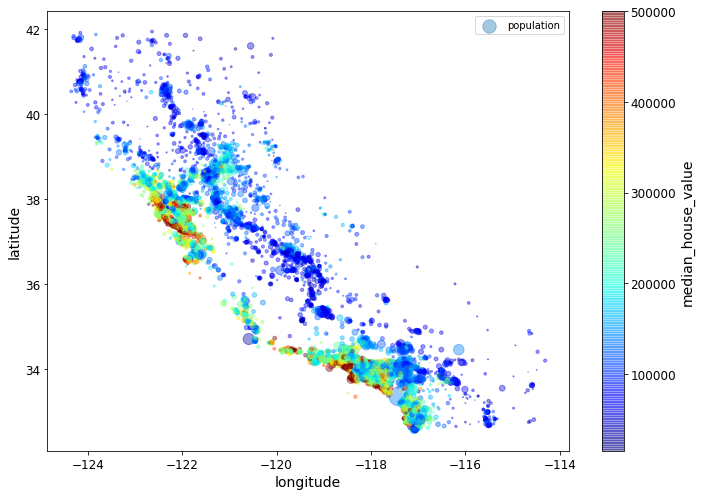

In [38]:
housing.plot(kind = "scatter",
            x = "longitude",
            y = "latitude",
            alpha = 0.4,
            s = housing["population"]/100,
            # Decides the size of the points
            # when plotting
            # The size of each district point
            # will be proportional to its
            # population. 
            label = "population",
             # 
            figsize = (10,7),
            c = "median_house_value",
            # setting array to be used in color map
            cmap = plt.get_cmap("jet"),
            # "jet" is a kind of colormap
            # plt.get_cmap("jet") helps 
            # to create the colormap.
            # If we don't enter a cmap argument
            # the plot will be use a gray scale
            # color map.  
#             colorbar = True, 
            sharex = False)
plt.legend()
save_fig("housing_prices_scatterplot")

__What do we learn? __ 
- housing prices are very much dependent on location. (eg: close to the ocean) 
- Idea: USe clustering algorithm to detect main clusters, and add new features that measure the proximity to the cluster centers. 
- Using ocean proximity can be beneficial, but not that simple as housing prices in coastal district are not that high in California. 
- Areas that are very less dense ( transparent ) are also very cheap. (There are very few or no red transparent(high price, low density) points). 



> ### ii) Look for Correlations: 

Since the dataset is not too large, you can easily compute the stadard correlation coeficient ( also called Pearson's r) between every pair of attributes using the `corr()` method.   
[__`sklearn.metrics.r2_score()`__]()
https://www.khanacademy.org/math/probability/scatterplots-a1/creating-interpreting-scatterplots/v/correlation-coefficient-intuition-examples
https://www.youtube.com/watch?v=dCgIavyFWIo
https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/0d81ce82-2135-4dfe-9f2a-2b1b57ac09d7
- The parameter p, the population correlation coefficient, is a measure of the strength of the linear relationship between 2 random variables X and Y. 
- We do not know p, as it is a parameter. We are going to estimate p, with :  
# $ r = \frac{SS_{XY}}{\sqrt{SS_{XX}.SS_{YY}}} $ 

# $ r = \frac{1}{n-1}\sum \frac{X_i - \bar{X}}{S_X}.\frac{Y_i - \bar{Y}}{S_Y} $  

- r is a unitless quantity. 
- lies between -1 and 1
- r has the same sign as the sample slope $\hat{\beta}_1 $ 
- if r is equal to 1 or -1, then all points fall directly on a line. 
- Pearson's r ranges from -1 to 1. 
    - close to 1: Strong positive linear correlation. 
        - As one increases, the other also increases.
        - As one decreases, the other also decreases. 
    - close to -1: Strong negative linear correlation. 
        - As one decreases, the other increases.
        - As one increases, the other one decreases
    - close to 0: No linear correlation.
        - A linear model is not able to describe the relationship between the two variables. 
- PROBLEM: r is not easy to interpret. 
    - Enter: The coefficient of determination. $ r^2 $ , which is the proportion of the total variation of Y in the sample that can be attributed to the linear relationship with X.  
# $ r^2 = \frac{Variance of \hat{Y}}{Variance of Y} $ 
- $ \hat{y} $  is the predicted values of our sample data. 
    - This will tell us how much Y may vary, only because of X (when we fit a line to the data) . 
- Y are the observed values of our sample data.  
    - This tells us how much Y actually varies. 
    
- The variation in the observed values of Y is: 
    - Partly due to the increasing trend ( As X increases, Y also increases. ) 
    - Partly due to variation about the line. 
    
- __The proportion of variation in Y that is due to that increasing trend  is $ r^2 $. __ 
- - __The proportion of variation in Y that can be explained by X is $ r^2 $. __ 
- Note that our $ r^2 $ here is 36 % , so: __ Aprx. 36% of the variability in the Y(activation level) can be explained by the linear relationship with X(empathic concern scale score).  The other 64% variation in Y is due to variation about the line.__ 
- Once you evaluate __$ r^2 $__, you can evaluate __r__. 
    - Once you evaluate the proportion of the total vairation of Y which can be attributed to the linear relationship with X __($ r^2 $)__ , you can evaluate strength of the linear relationship between X and Y ( __r__ ).
    - Note that, use r and r squared to evaluate LINEAR RELATIONSHIPS only. Even if there is a quadratic/cubic, etc. relationship between X and Y, r and r squared won't capture it properly. 
    

- Answering the question: 
    - __How much of the variance in Y(actual answer) is being explained by X answers the question__: 
    - __How well is the linear model fitting the data. __
    - __This is because the linear model that is fit to a data represents one of two reasons for the variance in Y, which are__:
         - increasing/ decreasing trend because of X. 
         - variation about the line 
    - __Concretely, example: If we have a data that is quite scattered. And we fit a line through it. __
             

-0.073170822072774477

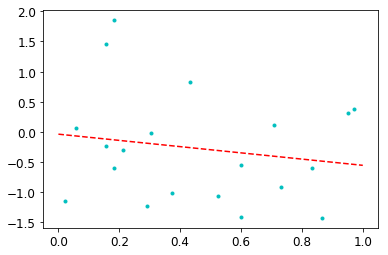

In [39]:
np.random.seed(42)
X = np.random.rand(20,1)
y = np.random.randn(20,1)
plt.plot(X, y, "c.")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
x_new = np.linspace(0.0,1.0,20).reshape(20,1)
y_pred = lin_reg.predict(x_new)
plt.plot(x_new, y_pred, "r--")

from sklearn.metrics import r2_score
r2_score(y, y_pred)

- __This tells us that -7.3% of the variation in Y can be explained by X__
- This can only happen when the model is arbitrarily worse than the one that predicts the average for every day point.  
- R2 score is:
    - 1 - SSR/SST: Here, the only way we get a R2 score worse than 0 is that we predict worse than SST. In other words, our sum of squared residuals($\hat{y} - y_i$) is more than the sum of squared total($y_i - \bar{y}$). 
     - We get an R2 score of 0 when the model always predicts the average. Then according to the formula:
         - 1 - SST/SST, as SSR and SST will be equal cause in both cases, we are subtracting the true value(y_i) from the mean of the true value. (y_i)
         

1.0

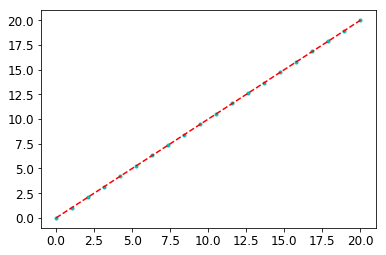

In [40]:
X = np.linspace(0,20,20).reshape(20,1)
y = np.linspace(0,20,20).reshape(20,1)
plt.plot(X, y, "c.")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, "r--")

from sklearn.metrics import r2_score
r2_score(y, y_pred)

__ This says that 100% of the variation in Y can be explained by X__. 


0.93185338151781105

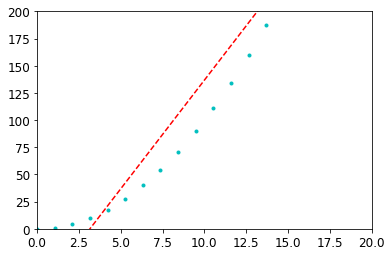

In [41]:
X = np.linspace(0,20,20).reshape(20,1)
y = np.linspace(0,20,20).reshape(20,1)**2
plt.plot(X, y, "c.")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, "r--")
plt.axis([0,20,0,200]) # zooming in

from sklearn.metrics import r2_score
r2_score(y, y_pred)

__This says the 93% of the variation in Y can be explained by X. __

0.29019830132595115

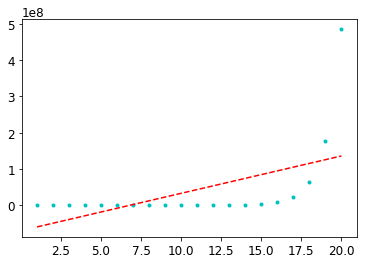

In [42]:
X = np.linspace(1,20,20).reshape(20,1)
y = np.exp(np.linspace(1,20,20).reshape(20,1))
plt.plot(X, y, "c.")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, "r--")


from sklearn.metrics import r2_score
r2_score(y, y_pred)

__ This says that 29% of the variation in Y can be explained by X__. 

0.0

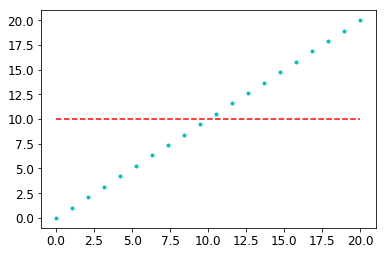

In [43]:
X = np.linspace(0,20,20).reshape(20,1)
y = np.linspace(0,20,20).reshape(20,1)
plt.plot(X, y, "c.")

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = np.array([y.mean()]*len(y))
y_pred.reshape(20,1)
plt.plot(X, y_pred, "r--")

from sklearn.metrics import r2_score
r2_score(y, y_pred)

__This tells us that 0% of the variation in Y is explained by X__. This is because a model that always predicts the expected value of y, disregardin the input features would get and R^2 score of 0.0. 


- [What is](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/0d81ce82-2135-4dfe-9f2a-2b1b57ac09d7) [R Squared?](https://www.youtube.com/watch?v=g2ext963IZg&index=2&list=PLvcbYUQ5t0UFhdkiCojiFOygmbMU19BFq)   
    - helps in measuring how well the hypothesis fits the training set.
    - SST ( Sum of Squared Totals )  is the squared difference between the the actual value $y$ and the mean of the actual values $\bar{y}$ 
        - # $ \sum_i (y_i - \bar{y})^2 $ 
        - It tells us how far the actual value is from its mean. 
    - SSE ( Sum of Squared Explained) is the squared difference between the predicted value and the mean of the actual values $\bar{y}$. 
        - # $ \sum_i (\hat{y_i} - \bar{y})^2 $ 
        - This tells us how much the model is explaining the variation of Y (from the mean). 
        
    - SSR (Sum of Squared Residulals ) is the sum of squared difference between true value $y_i$ and the predicted value $\hat{y_i}$.
        - # $ \sum_i (\hat{y_i} - y_i)^2 $ 
        - This tells us how much the model is __not__ explaining the variation of Y (from the mean).
    - R squared  is a measure __explained variation in the Y variable__.
    - # $ 1 - \frac{SSR}{SST} $ 
    - SSR is the ammount of unexplained variation in Y(true target) by the prediction model. 
    - SST is the total amount of variation in the true target Y. 
    - Therefore $\frac{SSR}{SST} $ is the % of the unexplained variation in Y by the prediction model. 
        - Answers the question: what percentage of variation in Y is __not__ explained by X / the prediction model. 
    - Therefore, 1 - % unexplained variation in Y is equal to the % explained variation in Y by X/ the prediction model. 

In [44]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

__What did we learn from this?__
- `median_house_value` is postively correlated to `medium_income` with a more than medium strength.  
- There is weak postive correlation of `total_rooms `, `housing_median_age` with  `median_house_value`. 
- There is weak negative correlation of `latitude` with  `median_house_value`. But that doesn't really make sense to take into account. 
- There is almost no correlation between `median_house_value` and : 
    - `households`
    - `total_bedrooms`
    - `population`
    - `longitude`



__Another way to check for Correlation is using Pandas' `scatter_matrix` function, which plots every numerical attribute against every numerical attribute. The number of plots you will get is $ n^2 $ where n is the number of numerical attributes.__ 
- Goinf thorugh all of them is impossible. Focus on a few promising attributes. 



//anaconda/envs/dlndf/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


Saving figure  scatter_matrix_plot


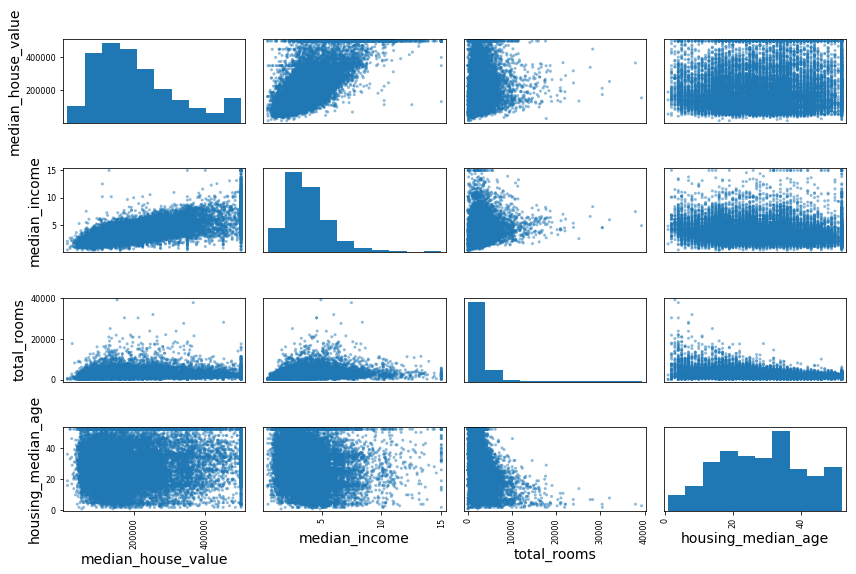

In [45]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.tight_layout()
save_fig("scatter_matrix_plot")

__Points_To_Note:__  
- The main diagonal(top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself (which is useless). Therefore, instead, Pandas displays a histogram of each attribute in the diagonal ( top left to bottom right). 
- The most promising attribute to predict the median house value is the median income, so let's zoom in on their correlation scatterplot : 

Saving figure  median_income_vs_median_house_value


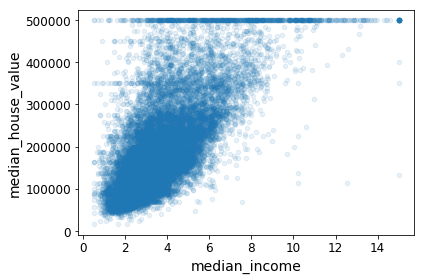

In [46]:
housing.plot(kind = "scatter",
            x = "median_income",
            y = "median_house_value",
            alpha = 0.1)
save_fig("median_income_vs_median_house_value")

- Zooming in , we see: 
    - Correlation is clealy visible. There is an upward trend inthe data.
    - Points are not too dispersed. 
    - Price Cap at 500,000 is clearly visible with a horizontal line at 500,000 indicating that no matter how much the `median_income` of a district increases, the prices do not cross 500,000. 
        - Recall that a price cap just means that if the median_house_value of a district was recorded more than 500,000, it was recorded as 500,000 only. 
    - There are other cappings visible too: 
        - 450,0000
        - 350,000
        - 280,000
- __DOUBT: You may want to remove the corresponding district to prevent your algorithm from learning to reproduce these data quirks__. 


> ### iii) Experimenting with Attribute Combinations

__DOUBT: How can we transform a tail heavy distribution by computing their logarithm?__  

- `total_rooms` is not very useful if you do not know the number of households. What you really want is the rooms/household ratio.   
- `total_bedrooms` is not very useful. You probably want to know the bedrooms/room ratio.  
- `population_per_household` also seems like an interesting attribute combination cause it tells us how many people are living in a house on average.  



In [47]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# >> Average number of rooms in a house in a district 

housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# >> Average number of bedrooms per rooms in a district

housing["population_per_household"] = housing["population"]/housing["households"]
# >> Average number of people living in a household
# in a district. 


__Looking back at the correslation matrix:__ 

In [48]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

__Learnings:__
- Interesting, the `bedrooms_per_room`(-0.25) is much more corrlated to `median_house_value` as compared to `total_bedrooms`(0.04) or `total_rooms`(0.13). 
    - It is negatively correlated. Means: The less bedrooms/rooms ratio, the higher the price of the house. 

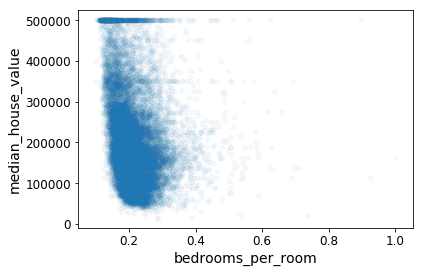

In [49]:
housing.plot(kind = "scatter",
            x = "bedrooms_per_room",
            y = "median_house_value",
            alpha = 0.04)

- `rooms_per_household`(0.14) is more correlated to `median_house_value` as compared to `total_rooms`(0.13) or `households`(0.06).  
    - It is positively correlated. Therefore, the higher rooms/household ratio, the higher the price of the house. 
- On the other hand, `population_per_household` has the worst correlation with `median_house_value` compared to any other attribute. 

[0, 5, 0, 520000]

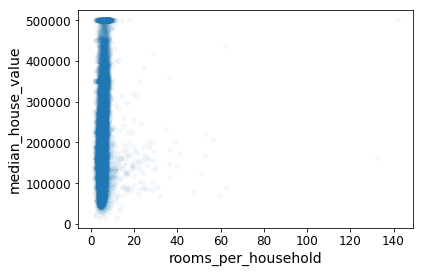

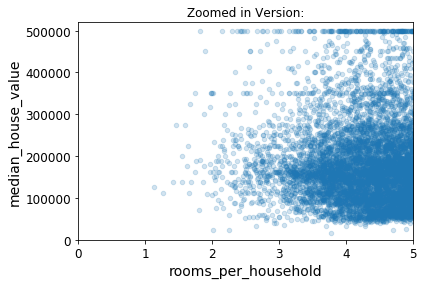

In [50]:
housing.plot(kind = "scatter",
            x = "rooms_per_household",
            y = "median_house_value",
            alpha = 0.04)
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2, title = "Zoomed in Version:")
plt.axis([0, 5, 0, 520000])

__Note:__  
- This round of exploration does not have to be absolutely thurough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonable prototype.  
- This is an iterative process. Once you have your prototype up and running, you can anlayse its output, gain more insights and come back to the exploration step.   
- Let's just view the final statistics of our data: 

In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724,5.440341,0.212878,3.096437
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830,2.611712,0.057379,11.584826
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000,4.442040,0.175304,2.431287
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000,5.232284,0.203031,2.817653
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000,6.056361,0.239831,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


> ## 5. Prepare the Data for Machine Learning Algorithms:    

- Write function to do prepare data for ML algorithm ofr the following reasons:  
     - Allows you to reproduce these transformations easily on any dataset. (eg: the next time you get fresh data) 
     - Gradually build library of transformation functions that you can use later. 
     - can be used in live system to transform the data befor feeding it to the algorithms. 
     - see which combination of transformations works best. 
     
     
> ### i) Split the features and the labels as you may not want to apply the same transformations to the predictors and the target values__

In [52]:
housing = strat_train_set.drop("median_house_value", axis = 1)
# >> Makes a copy of strat_train_set
# >> drops the median_hous_value from the copy 

housing_labels = strat_train_set["median_house_value"].copy()


> ## Data Cleaning: 

> ### ii) Handling numerical attributes ; missing values 

- Most machine learning algorithms cannot work with missing features. 
    - `total_bedrooms` has some missing values, so let's fix this. You have 3 options: 
        - Get rid of those corresponding districts. [dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
        ```python
        housing.dropna(subset = ["total_berdrooms"])
        ```
        - Get rid of the whole attribute: `drop()`
        ```python
        housing.drop("total_bedrooms", axis = 1)
        ```
        - Set the values to some value (0, mean, the median: [fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
        ```python 
        housing["total_bedrooms"].fillna(median, inplace = True)
        ```  

In [53]:
sample_incomplete_rows = housing[housing.isnull().any(axis = 1)].head()
# housing.isnull().any() returns a series telling if any 
# of the values in the column is NaN. 

# housing.isnull().any(axis=1) returns a series telling
# if any of the values in the row is NaN.

# housing[housing.isnull().any(axis = 1)] does boolean
# indexing on the housing dataframe, and picks the rows 
# where a NaN value exists. 
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


- Scikit - Learn provides a handy class to take care of missing values: `Imputer`.
    - Impute means: represent (something, especially something undesirable) as being done, caused, or possessed by someone; attribute.
    - Create a imputer instance, specifying that you want to replace each attribute's missing values with the median of that attribute:   

In [54]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")


- Now,
    - Since the median can only be computed on numerical attributes, it will give an error if give it the dataframe with the `ocean_proximity` attribute

In [55]:
housing_num = housing.drop("ocean_proximity", axis = 1)

- Now, 
    - You can fit the `imputer` instance the the training data using the `fit` method. 
        - It will compute the median of each attribute and store in the `statistics_` instance variable. In order to acess them, use `imputer.statistics_`
        - Only the `total_bedrooms` attribute had missing values (for now) but we cannot be sure about the inconsistencies in the new data, so we will `fit` the `imputer` to all the numerical attributes. 
        - It will replace the `NaN` value in any column, with the median of that column. 

In [56]:
imputer.fit(housing_num)
# >> fitting the imputer to all the numerical attributes

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [57]:
imputer.statistics_
# >> median for each column is stores in statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

Checking that this is the same as manually computing the median of each attribute. 

In [58]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

Now we can use this "trained" `imputer` to transform the training set by replacing missing values by learning medians. 

In [59]:
X = imputer.transform(housing_num)
# >> The result is plain Numpy array containing the transformed
# features. 
X

array([[ -121.89  ,    37.29  ,    38.    , ...,   710.    ,   339.    ,
            2.7042],
       [ -121.93  ,    37.05  ,    14.    , ...,   306.    ,   113.    ,
            6.4214],
       [ -117.2   ,    32.77  ,    31.    , ...,   936.    ,   462.    ,
            2.8621],
       ..., 
       [ -116.4   ,    34.09  ,     9.    , ...,  2098.    ,   765.    ,
            3.2723],
       [ -118.01  ,    33.82  ,    31.    , ...,  1356.    ,   356.    ,
            4.0625],
       [ -122.45  ,    37.77  ,    52.    , ...,  1269.    ,   639.    ,
            3.575 ]])

Putting it back into a Pandas DataFrame: 

In [60]:
housing_tr = pd.DataFrame(X, 
                          columns = housing_num.columns,
                         index = list(housing.index.values))

# housing.index returns an index object
# housing.index.values returns an array of the indices
housing_tr


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999


__ Checking whether or not we filled the rows where NaN was there__: 

In [61]:
housing_tr.loc[sample_incomplete_rows.index.values]
# >> See the total_bedrooms column. All filled with
# the median = 433.0 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


### SciKit Learn Design: 

- __Consistency__:  All objexts share a consistent and simple interface. 
    - __`Estimators`__: 
        - Object that estimates some parameter (median) on a dataset is called an estimator (eg: `imputer`). 
        - The estimator is performed by the `fit()` method, and it takes in the dataset and/or the labels as parameters. 
        
        ```python
        
        imputer.fit(housing_num)
        ```
        
        - Any other parameter needed to guide the estimation process is considered a `hyperparameter` ( eg: `strategy`). 
        - Must be set as an instance variable (generally via a constructor parameter). 
        
    - __`Transformers`__:
    
         - Some `estimators` can also transform the dataset (eg: `imputer`).
         - The tranformation is performed by the `transform()` method, with the `dataset` to transformed as a paremeter. 
         
         ```python
         
         X = imputer.transform(housing_num)
         ```
         
         - It returns a transformed dataset. 
         - The transformation is generally relied on the learned parameters ( eg: medians of each column). 
         - All `transformers` have a convenience method known as `fit_transform()` that is equivalent to calling `fit()` and then `tranform()` but sometimes `fit_tranform()` is optimized.  Also `fit_transform()` requires a 2D array as its input, generally. 
         
    - __`Predictors`__:  
        - Some `estimators` are capable of making predictions on a dataset.
        - eg: `LinearRegression` predicted a country's life satisfaction, given its GDP. 
        - A `predictor` always has a `predict()` function that takes a dataset of new instances and returns a dataset of corresponding predictions. 
        - It also has a `score()` method that measure the quality of the predictions given a test set ( and the corresponding labels in the case of supervised learning). 
        
- __Inspection:__ 
    - All the `estimators`'s hyperparameters are accessible via public instance variables. 
    
    ```python    
    imputer.strategy

    ```
    - All the `estimators`'s learned parameters are also accesible via public instance variables with an underscore suffix: 
    ```python
    imputer.statistics_
    ```
    
- __Non-Proliferation of classes__: 
    - Datasets are represented as Numpy arrays or SciPy sparse (thinly dispersed/ scattered) matrices , instead of homemade classes.
    - Hyperparameters are just regular Python strings or numbers. 
    
- __Composition:__ 
    - Existing building blocks are reused as much as possible. For example: It is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see. 
    
- __Sensible defaults:__  
    - makes it easy to create a baseline working system quickly. 
    
     
     

> ### iii) Handing Text and Categorical Attributes  

- Note that `housing_tr`, is our training data which has no column about `ocean_proximity`. Therefore, we need to customise the column and add it to the dataframe. 

- MAchine Learning Algorithms mostly prefer number, so let's conver the text to numbers. 

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# >> Creating a LabelEncoder estimator object
housing_ocean_cat = housing["ocean_proximity"]

housing_ocean_cat_encoded = encoder.fit_transform(housing_ocean_cat)
# >> fits the data of housing_ocean_cat to the encoder
# >> and tranforms it into an array of encoded categories

print(housing_ocean_cat_encoded)
# >> array([0, 0, 4, ..., 1, 0, 3])

encoder.classes_
# >> accessing estimator's learned parameters

# array(['<1H OCEAN', 'INLAND', 'ISLAND',
#        'NEAR BAY', 'NEAR OCEAN'], dtype=object)


[0 0 4 ..., 1 0 3]


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

- '1H OCEAN' is 0
- 'INLAND' is 1
- 'ISLAND' is 2
- 'NEAR BAY',  is 3
- 'NEAR OCEAN' is 4 

- __PROBLEM__ : One issue with this representation is that ML algorithms will assumed that two nearby values are more similar than two distict values. 
    - This is not the case. 0 and 4 are more similar than 0 and 1, not that it matters. 
- __SOLUTION__ : `One-Hot-Encoding`. 
    - Scikit-Learn provides a `OneHotEncoder` encoder to convert integer categoriacal value into one-hot vectors. 
    - Let's encode the categoried as one hot vectors. 
    - Note that `fit_tranform()` generally expects a 2D array. We will need to reshape the 1D  `housing_ocean_cat_encoded` to a 2D array.   

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# >> Creates an estimator object 

housing_ocean_cat_1hot = encoder.fit_transform(
    housing_ocean_cat_encoded.reshape(-1,1))
# >> Note: (-1,1) creates a 2D column matrix/ vector.
# It has 1 column, and the number of rows is inferred
# from the data that is reshaped. 

# >> Additionally, to create a 2D row matrix/vector 
# of housing_ocean_cat_encoded, you can use: 
# housing_ocean_cat_encoded.reshape(1,-1), wherein it
# will just infer the number of columns from the 
# data that is being reshaped. 

housing_ocean_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- Notice: The output is a SciPy `sparse matrix` (dispersed/scattered matrix).  
This is very useful when you have categorical attributes with thousands of categories. 
After `one-hot encoding` we get a matrix that is full of zeros except for one 1 per row.  
This uses tons of memory, so instead `sparse matrix` only stores the location of the non-zero elements. 

- Use `toarray()` method to convert the sparse matrix to an array. 
    - Note that DataFrame object do not have this method. 


In [64]:
housing_ocean_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

- __We can apply both tranformations (from text categoried to integer categories, then from integert categoried to one-hot vectors) in one shot using the `LabelBinarizer` class:  __

In [65]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
# >> Creates the LabelBinarizer() estimator object

housing_ocean_cat_1hot = encoder.fit_transform(housing_ocean_cat)  
# >> fitting and transforming the cateforical data
# to one hot encoded vectors, per district/row datapoint. 

housing_ocean_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

- Note that this directly returns an array, not a sparse 
matrix. 
- You can get a sparse matrix using: 
    - `sparse_output = True` in the `LabelBinarizer()` constructor. 

> ### iv) Custom Transformers:  

- custom cleanup operations
- combining specific attributes
- want your transformer to work seemlessly with SkLearn's functionalities ( `pipelines`) 

- Dynamic Programming Languages: 
    - high-level programming languages which, at runtime, execute many common programming behaviours that static programming laguages perform during compilation 
- Strongly Typed Language: 
    - more likely to generate errors or refuse to compile if the argument passes to a function does not closesly match the expected type. eg: C++ , Python : You cannot add strings and integers. 
- Weakly typed language: 
    - may produce unpredictable results or may perform implicit type conversions. eg: Perl, JavaScript: You can add strings to numbers. 
- Duck Typing: The idea is that you do not need a type in order to invoke an existing method to an object - if a method is defined on it, you can invoke it. 
    - The word "typing" does not mean typing on keyboard, instead it means determining "What type a thing is that thing?" 
    - Loose determination of a type
 __DOUBT: Sklearn relies on ducktyping (not inheritance) __
- All you need to do is create a class and implement 3 methods: 
    - `fit()` 
    - `transform()`
    - `fit_transform()` , can be done for free by simply adding `TransformerMixin` as a base class (A base class is the parent class of a derived class. Classes may be used to create other classes. A class that is used to create (or derive) another class is called the base class. Also called a super class.) 
    - If you add `BaseEstimator` as base class (and avoid `*agrs` and `**karargs` in your constructor) , you will get 2 extra methods ( `get_params()` and `set_params()`). 
        - This will be useful for automatic hyperparameter tuning. 
    - Example: Here is a small tranformer class the adds the combined attributes we discussed earlier. 
    
__Note:__
- i) [numpy.c(underscore)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html#numpy.c_)
Translates slice objects to concatenation along the second axis, the columns.
A column is concatenated to the dataframe. 

- Axes are defined for arrays with more than one dimension. A 2 dimensional array has two corresponding axes: 
    - the first running vertically downwards across/along rows (axis 0)
        - If you want to do an operation on each column, like sum each column? You would be performing a vertical operation, along the rows. 
        - To remember, just remember that axis 0 performs operation in the `y axis direction` 
    - second running horizontally across/along all columns (axis 1)
        - If you want to do an operation for each row of the array , like sum each row? You would be performing a horizontal addition, along the columns. 
        - To remember, just remember that axis 0 performs operation in the `x axis direction` 
    - All the input array dimensions except for the concatenation axis must match exactly. 
    
```python
x = pd.DataFrame([[1,2],
                [3,4],
                [5,6]])
y = np.array([1,2,3])

np.c_[x,y]
# array([[1, 2, 1],
#        [3, 4, 2],
#        [5, 6, 3]])
```


- ii) Child class can ingerit from multiple parent/base classes:  

```python 

class First(object):
    def __init__(self):
        print ("first")
    def print_bye(self):
        print("bye")

class Second(object):
    def __init__(self):
        print ("second")

    def print_hello(self):
        print("hello")

class Third(Second, First):
    def __init__(self):
        super(Third, self).__init__()
        print ("that's it")


x = Third()
# >> It initialised the Parent class Second.
# >> once its done initalising, prints that's it.

# >> All methods of the class First and Second are
# accessible to the child class Third. 
x.print_hello()
# >> hello

x.print_bye()
# >> bye

```

__What are we going to do here__  
- Importing base classes `BaseEstimator` and `TransformerMixin`  
- Assigning indices to rooms, bedrooms, population, and household columns, according to the training datset, `housing`. 
- Creating a class, that has three methods: 
    - `fit()` (returns `self`)
    - `transform()`
    - `fit_transform()` , 
         - can be done for free by simply adding `TransformerMixin` as a base class. 
         - This means that the class `TransformerMixin` already has a functin `fit_trasform()` which will be accessible to the child class.
    - Adding `Base Estimator` helps in getting accesss to two extra methods: 
        - `get_params()`
        
        ```python
        
        attr_adder.get_params()
        # >> {'add_bedrooms_per_room': False}

        attr_adder.set_params()         #CombinedAttributeAdder(add_bedrooms_per_room=False)
        ```
        - `set_params()`, which will both be useful for automatic hyperparameter tuning. 
        
        

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        # No *args, or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        # >> indexing all rows of column number 
        # rooms_ix =>  rooms column
        # and dividing that with all rows of
        # column number households_ix

        population_per_household = X[:, population_ix] / X[:, household_ix]
        # >> indexing all rows of column number 
        # population_ix =>  rooms column
        # and dividing that with all rows of
        # column number households_ix

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
            # >> Adding columns of rooms_per_household
            # population_per_household, bedrooms_per_room
            #  to the  dataset. 
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
# >> We use housing.values becase the transform function
# takes in a 2D numpy array. 
# >> This will a 2D numpy array
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

Now, you may be wondering why do we have this `hyperparameter`: `add_bedrooms_per_room` set to `True` by default? 
- It will help us in getting to know if that attribute helps the ML algo or not. 
- More generally, we are not really sure whether the `bedrooms_per_room` will help the ML algo or not, therefore we __gate__ it. 
- You can __gate__ any attribute that you are not sure about. 
- The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination.  



> ### v)  [Feature Scaling](https://www.coursera.org/learn/machine-learning/lecture/xx3Da/gradient-descent-in-practice-i-feature-scaling)

- [holehousenotes](http://www.holehouse.org/mlclass/04_Linear_Regression_with_multiple_variables.html)
- ML algos don't perform well if the the input numerical attributes have different scales.  
    - For eg: The total number of rooms ranges from 6 to 39,320.. while the median_income ranges from 0 to 15. 
- Scaling the target values is not generally required. 
- 2 ways to get all attrtibutes to have the same scale:
    - __Min-Max scaling__
        - Also called Normalization
        - values are shifted and rescaled so that they end up ranging from 0 to 1. 
        - #  $ \frac{X - Min_X}{Max_X - Min_X} $ 
        - `Skelearn`'s __`MinMaxScaler`__ can be used for this. 
            - It has an extra hyperparameter `feature_range` that lets you choose the range if you don't want 0-1 for some reason. 
            
    - __Standardization__ 
        - # $ \frac{X - \bar{X}}{\sigma{_X}^2} $
        - This makes all the columns have a mean of 0. 
        - The resulting distribution of a column will have a standatd deviation / variance of 1. 
        - Use __`StandardScaler`__ for standardization. 
    - Standardization does not bound values between 0 and 1. ( Remember 95% of the data is between +- 1.96 standard deviations away from the mean). This may be a problem for some algos, like Neural Networks. 
    - Standardization is much less affected by outliers. 
- __WARNING__: __ DOUBT: __As with all other transformations, it is important to fit the scalers to the training data onlt, not the full dataset (including the test set). Only then can you use them to transform the trainig set and the test set ( and the new data). 


> ### vi) [Transformation Pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html):    

- There are many data transformation steps that need to be exectured in the right order. 
- __`Pipeline`__ class helps with such sequence of tranformations.    
- Recall that `housing_num` is 2D numpy array extracted from out housing dataframe, excluding the `ocean_proximity` column. In other words, it also have numerical attributes. 
- The `Pipeline` constructor takes a list of `name,estimator` pairs defining a sequence of steps. The `names` cane be anything as long as they do not contrain double underscores "`__`". 
- All but the last estimator must be `transformer`s (i.e they must have a `fit_transform()` method. 
- When you call the pipeline's `fit()` method, it calls the `fit_transform()` sequentially on all the transformers, passing the output of each call as the parameter to the next call, until it reached the final estimator, for which it just calls the `fit()` method. 
- The pipeline exposes the same methods as the final estimator. 
- In the following code, the last estimator is also a `transformer`, so the pipeline has a `transform()` method that applies all the tranforms to the data in sequence. 
- The pipeline also has a `fit_tranform()` method. 
- Note: The input to the `fit_tranform` is a 2D numpy array. 

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = 'median')),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler())
])
# >> Creating a Pipeline object 

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr.shape

(16512, 11)

In [68]:
housing_num.shape
# >> 3 columns have been added.

(16512, 8)

In [69]:
housing_num_tr = pd.DataFrame(housing_num_tr, 
                          columns = list(housing_num.columns) + \
                              ["rooms_per_household",
                               "population_per_household", 
                               "bedrooms_per_room"],
                             index = list(housing_num.index.values))
housing_num_tr.head()
#                          index = list(housing_num.index.values))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
17606,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
18632,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
14650,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3230,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
3555,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928


__Writing a custom transformer to to feed a Pandas DataFRame derectly into out Pipeline, instead of first manually extracting the numerical columns into a 2D Numpy array.__ 

In [70]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    """
    This transformer will tranform the data by `selecting`
    the desired attributes, dropping the rest, and 
    coverting the resulting Dataframe into a Numpy array. 
    """
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    # >> __init__ takes in one argument, the list 
    # of attributes. 
    
    def fit(self, X, y = None):
        return self # Nothing else to do
    
    def transform(self, X):
        return X[self.attribute_names].values
    # Converting the DataFrame to a numpy array

- Now, we can easily feed in a Pandas DataFrame to the Pipeline by having the first estimator as __`DataFrameSelector`__.    


In [71]:
num_attributes = list(housing_num.columns)
num_attributes
# >> list of numerical attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [72]:
cat_attributes = ["ocean_proximity"]
# >> list of categorical attributes

In [73]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    # Selects the numerical attributes from the 
    # input dataframe to the Pipeline , which is our 
    # housing dataset. (inputted later). And then converts
    # those columns to a 2D numpy array. 
    
    ('imputer', Imputer(strategy = 'median')),
    # Will fill in all the NaN values in each column of the
    # input dataframe, by the median of that column. 
    
    ('attribs_adder', CombinedAttributesAdder()),
    # Will add the 3 columns to the dataframe: 
    # i) `rooms_per_household`
    # ii) `population_per_household`
    # iii) `bedrooms_per_rooms`, Note: bedrooms had NaN
    # values. We needed to impute the dataset, and then
    # only could we add the column `bedrooms_per_room`
    
    ('std_scalar',StandardScaler()),
    # Finally, we will standardise each numerical column 
    # of the dataset. 
    # This will make it easier for Gradient Descent to 
    # converge.     
])
# >> Creating a Pipeline Object for numerical attributes 
# of the housing dataset. 

In [74]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    # Selects the categorical attributes from the 
    # input dataframe to the Pipeline , which is our 
    # housing dataset (inputted later). And then converts
    # those columns to a 2D numpy array. 
    
    ('label_binarizer', LabelBinarizer())
    # This will one-hot encode the labels in the 
    # categorical columns of the dataset. 
])


__But How Can We Join The 2 Pipelines into a single pipeline?__ 
- Using __`Sklearn`'s `FeatureUnion`__ class. 
    - You give this class's instance a `transformer_list`, which can be a list of transformers, or a list of `transformer pipelines`.
    - When `FeatureUnion`'s `fit_transform()` function is called on the instance, it runs each `transformer`s or each `pipeline transformer`'s `fit()` and `tranform()` method __in parallel__. 
    - It waits for each of the `tranformer`s outputs, and then concatenated them. 
    - Returns the result. 

In [75]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(
    transformer_list = [
        ("num_pipeline", num_pipeline),
        # Implements the num_pipeline in parallel
        # when fit_tansform() is called
        ("cat_pipeline", cat_pipeline)
        # Implements the cat_pipeline in parallel
        # when fit_tansform() is called
    ] )

__Running the whole pipeline__: 


In [76]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [77]:
housing_prepared.shape
# (16512, 16)
# >> has 16512 rows and
# 15 columns

# >> That is 11(8 + 3 new) columns from before
# PLUS the 4 columns which show one-hot encoding of the
# categorical variable 

(16512, 16)

__DOUBT: Why are we not adding the same transformations to the test set?  Won't the test set need to be in the same format(need some information) for it to predict ? Why are we not doing the following to the test set also: __
- i ) imputing columns
- ii) Adding the 3 new attributes
- iii) feature scaling
- iv) one-hot encoding the categorical variable __


> ## 6. Select and train a model:    

- You have framed the problem. 
- Got the data. 
- Split the data into test and training set. 
- Explored it. 
- Wrote transformation pipeline to clean up and perpare your data. 
Now, you are ready to select and train a Machine Learning model. 




>### i) Training and Evaluating on the Training Set 

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

__DOUBT: IS there are way to visualise the regression line in higher dimesnions? __

In [79]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [80]:
some_labels = housing_labels.iloc[:5]
some_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [81]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared[0]
# 1st row of the data

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [82]:
print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [83]:
print("Labels: ", list(some_labels))

Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [84]:
print("Absolute Error: " , np.array(some_labels) - np.array(lin_reg.predict(some_data_prepared))) 





Absolute Error:  [ 75955.39540714  22831.19302789 -14056.43331178 -12918.98886849
  64752.44150121]


__Let's measure this regression model's RMSE on the whole training set using SkLearn's `mean_squared_error` function.__  

In [85]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_predictions, 
                             housing_labels)
print("Mean of Square Errors on training set: ", lin_mse)

lin_rmse = np.sqrt(lin_mse)
print("Root of Mean of Squared Error on training set: ", lin_rmse)

Mean of Square Errors on training set:  4709829587.97
Root of Mean of Squared Error on training set:  68628.1981985


__How bad is this?__  
Let's have a look at the histogram of `median_house_value`.

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

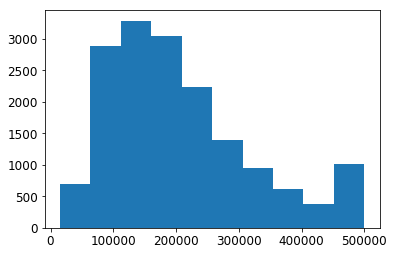

In [86]:
plt.hist(housing_labels)
housing_labels.describe()

We notice that most of the median_housing_values range between 100,000 and a little more than 200,000.   
Threfore, a typical prediction error of 68,000 is not very satisfactory. 
- This is an exaple of a model underfitting the training data. 
- Features may not be providing enough information to make a good prediction
- Or, model is not powerful enough. 

- __Recall, the 3 ways of fixing underfitting:__ 
    - Use a more powerful model 
    - feed algorithm with better features
    - reduce the constraints on the model
        - This model is not regularized. 

In [87]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,
                             housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Wait...whaaaatttt? No error at all?  
Could this model really be absolutely perfect? 
- Ofcourse, it is much more likely that the model has overfit the data. 
- How can you be sure? 

> ### ii) CROSS VALIDATION:  

- The following will perform [K-fold cross validation](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/89692644-156f-4447-8601-ce46b5f1c572/lessons/bc61c575-ae7c-4243-bfc2-bff377e7216a/concepts/a5290356-4c84-4cd0-9af3-dc8e06117fb4)
        - It randomly splits the training set into 10 distinct subsets called folds.  
        - Then it trains and evaluates the Decision tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. 
        - The fold that is chosen for evaluation is called the validation set. 
        - The result is an array containing the 10 validation set evaluation scores. 
- The only confusing part of the parameters of this `cross_val_score` function is `scoring` parameter. It is basically the type of `model evaluation` you want to conduct, or which [cost_function](http://scikit-learn.org/stable/modules/model_evaluation.html) do you want to choose. 
- __Warning__: "neg_mean_squared_error" basically means the negative of mean squared error. This means, that the greater the "neg_mean_squared_error", the better it is. As compared to the `cost_functions` where lower the cost, the better it is. 
     - This is why we use `(-scores)` when calculating the square root. 

In [88]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         housing_prepared, 
                         housing_labels,
                        scoring = "neg_mean_squared_error", 
                         cv = 10,
                        )
# >> Will return an array of scores. 

# >> The inputs to the cross validation score function are:
# i) The ML model used
# ii) The Input Dataset
# iii) The Labels
# iv) scoring: string, telling which cost function to use
# v) cv: int- number of folds

tree_rmse_scores = np.sqrt(-scores)

__Looking at the result:__

In [89]:
def display_scores(scores):
    print("Scores ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores  [ 69913.62164355  66278.13186203  71853.26839187  69464.02561609
  71061.873483    76150.43755673  70626.41396393  71544.41811278
  77404.61022128  70558.4356335 ]
Mean:  71485.5236485
Standard Deviation:  3039.52320122


- Recall we got a RMSE of 0.0 when we used the Decision Tree. That meant, out model was perfectly predicting everything in our training set. 
- But here, the error on our validation sets is so high! 
    - ```[69327.96254029  66645.45550442  70141.75458885  70117.84608579
  71506.61676029  75524.1593296   71107.19945334  70973.4324982
  75532.20719165  70396.48573902]``` 
The Decision Tree gives an mean validation error ( 711127 ), that is worse than what Linear Regression's RMSE ( 68,000) gave !  
__ What was the point of using K fold cross validation? __ 
- It not only allows yoiu to get an estimate of the performance of your model ( 711127 ). But also measure how precise the estimate is or how much that estimate varries ( i.e. Standanrd Deviation of the errors) 

__ Computing the same scores for the Linear Regression model, to be sure that the Linear Regression model, though bad, performs better than Decision Tree__. 

In [90]:
scores = cross_val_score(lin_reg, 
                         housing_prepared, 
                         housing_labels,
                        scoring = "neg_mean_squared_error", 
                         cv = 10,
                        )

lin_rmse_scores = np.sqrt(-scores)

In [91]:
scores = display_scores(lin_rmse_scores)

Scores  [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean:  69052.4613635
Standard Deviation:  2731.6740018


- Here we see that the error on the validation sets is not that far away from the RMSE we got for Linear Regression (68,000) : 
```[ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
``` 
- This tells us that the error on the training and validation sets are converging, though both errors are very high. 
- Again, Linear Regression here is a solid example of __underfitting__. 



- The idea here is to try a bunch of different model on your dataset without trying to tune the hyperparameters of any model. 
- Then shortlist some model which seems to do well. 

- __TIP:__ You should save every model you experiment with, so you can come back easily to any model you want.   Make sure that you save: 
     - hyperparameters and the trained parameter
     - cross validation scores 
     - actual preidction score. 
- This will help you to easily compare scores across model types, and compare the types of erros they make. 



In [92]:
from sklearn.externals import joblib

joblib.dump(lin_reg, "linear_regression_housing.pkl")
# ... and later 
# my_model_loaded = joblib.load("linear_regression_housing.pkl")


['linear_regression_housing.pkl']

Trying out the Random Forest Regressor: 
- they work by training many Decision Trees on random subsets of the features, then avergaing out their predictions. 


In [93]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [94]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, 
                               housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21941.911027380233

__Conducting Cross Validation with `RandomForestRegressor` to see if it underfits, overfits, or is just right__ 

In [95]:
scores = cross_val_score(forest_reg, 
                         housing_prepared, 
                         housing_labels,
                        scoring = "neg_mean_squared_error", 
                         cv = 10,
                        )

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores  [ 51650.94405471  48920.80645498  52979.16096752  54412.74042021
  50861.29381163  56488.55699727  51866.90120786  49752.24599537
  55399.50713191  53309.74548294]
Mean:  52564.1902524
Standard Deviation:  2301.87380392


- The RMSE score with `RandomForestRegressor` was: 22,000(aprx)
- The scores on the validation sets seem quite higher than the RMSE. This means that the model is overfitting.  
- Though this model has got the least RMSE and least Validation Error by far. 
- So it does seem promising. 

# 7. Fine - Tune Your Model   
- Let's say you now have shortliste of promising models. 
- You now have to fine tune them. 
- Let's look at a few ways to do that. 

> ### i) Grid Search:  
- fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. 
    - very tedious work 
    - no time
- SciKit-Leanr's `GridSearchCV` search the best hyperparameters for you. 
    - You need to tell it which hyerparameters youi want it to experiment with, and what values to try out
    - It will evaluate all possible combinations of hyperparameter values, using cross-validation. 
    - The following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`. 

[Udacity's explanation of Grid Search Cross Validation](https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/89692644-156f-4447-8601-ce46b5f1c572/lessons/a7ae4d17-220d-4496-af22-ef7ba45d2802/concepts/92ba91b9-818e-4755-ab69-8e123561e7ef)

- First, we train a bunch of models with our training data.
- Then, we use the cross validation error to pick the best of those models.
- Finally, we test our model on the testing data to make sure our model generalizes well. 
- There is a difference between the parameters and hyperparameters. 
    - The parameters refer to the weight, or the coefficient or slope of the line of Linear Regression.
    - There is a difference between a learning algorithm and a model: 
         - The algorithm is the general approach you take. 
         - The model is what you get when you run the algorithm over your training data and what you use to make predictions on new data. 
    - The hyperparameter refer to the parameters( guideline/restriction) of the learning algorithm (not of the model). 
        - This basically means that hyperparameters are the things that tweak the learning algorithm, not the hypothesis function (model) . 
        - In other words, hyperparameters affect the way a learning algorithm finds a solution (hypothesis function /model ). 
        - Concretely: For eg: The regularization lambda is a hyperparameter, as it affect the way we find the weights (which are parameters(guideline/restriction) of the hypothesis/model).
            - For eg: I found a line y = w1x + b when i used the regularization hyperparameter lambda = 0.1. Here lambda is a hyperparameter and w1, b are the parameters of the model. 
- Having just one hyperparameter is still easy. A Grid Search Cross Validatio just finds all the different combinations of hyperparameters and picks the combination with the least error. 
- For eg: If we want to comare only a linear and poplynomial model of a SVM, we can create a Grid Search Table. 
    - Each row will represent a differt value of Kernel.
    - Each column will represent the degree of the polynomial. 
    - This way we can compare different values of Kernel combined with different degree models, and choose the one with the least error. 
    


In [96]:
from sklearn.model_selection import GridSearchCV 

param_grid = [{
    'n_estimators': [3, 10, 30],
    'max_features': [2, 4, 6, 8]},
    {'bootstrap':[False],
    'n_estimators':[3,10],
    'max_features':[2, 3, 4]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

KeyboardInterrupt: 

__GridSearchCV code explained: __
- This `param_grid` tells Scikit-Learn to first evaluate all $ 3 \times 4 = 12 $ combinations of `n_estimators` and `max_features` hyperparameter values specified in the first `dict`.  
- Next, it tries out all $ 2\times 3 = 6 $ combinations of hyperpameter values in the second `dict`. 
- `bootstrap` hyperparameter is set ot`False` instead of `True` ( which is deafualt value for this hyperparameter). 
- All in all, the grid search will explore $ 12 + 6 = 18 $ combinations of `RandomForestRegressor` hyperparameter values, and it will train each model five times ( sich we are using `cv = 5` , i.e _5-fold cross validation_. 
- In other words, it will have $ 18 \times 5 = 90$ rounds of training! 
- It may take a lot of time, but when it is done, you get the best combination of parameters like this: 

In [ ]:
grid_search.best_params_

__ You can also get the `best estimator` directly : __

In [ ]:
grid_search.best_estimator_

- __NOTE:__ since `30` was the highest vlaue you entered for your `n_estimators` in `param_grid`, you should try out higher values to see if the performance keeps on increasing. 
- If `GridSearchCV` is initialized with `refit = True` (which is default), then once it finds the best estimator using cross validation, it retrains it on the whole training set. This is usually a good idea since feeding it more data will likely improve its performance. 


In [ ]:
# Cross Validation Scores: 
cvres = grid_search.cv_results_
cvres # csv of results

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
for mean_score, params in zip(cvres["mean_test_score"],
                             cvres["params"]):
    # Printing RMSE with the parameters used 
    print("RMSE: ", np.sqrt(-mean_score), " using parameters: "
          ,params)
#>> RMSE:  49925.5414181  using parameters:  
# {'max_features': 6, 'n_estimators': 30}


__TIP:__ 
- Don't forget that you can treat some of the data preparation steps as hyperparameters. For examples, the grid search will automatically find out whther or not to add a feature you were not sure about. 
    - Eg: Using the `add_bedrooms_per_room` hyperparameters of your `CombinedAttributeAdder` transformer. 
- Also used to find the best way to handle outliers, missing features, feature selection, and more. 
- __DOUBT__ : How (maybe later in book) 

> ### ii) Randomized Search: 

- The GridSearchCv approach works best when you're exploring relatively few combinations, like in the previous example. 
- `RandomizedSearchCV` is used when the hyperparameter `searchspace` is large. 
- It is used in the same way as `GridSearchCV` class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random value for each of the hyperparameter every iteration. 
- This approach has 2 main benefits: 
    - If you let randomized search run for 1,000 iterations, this approach will explore 1000 different values for each hyperparameter ( instead od just a few values per hyperparameter with the grid search approach). 
    - You have more control over the computing budget you can allocate to hyperparameter search, simply by setting the number of iterations. 

> ### iii) Ensemble Methods:   

- Another way to fine - tune your system is to combine the models that perform best. 
- The group ( or "ensemble" ) will often perofmr better than the best individual model ( just like Random Forests perform better than individual Decision Trees they rely on) . 


### iv) Analyze the Best Models and Their Errors: 

- You will often gain a good insight into the problem by inspecting the best models. 
- For example, the `RandomForestRegressor` can indicate the relative importance of each attribute for making accurate predictions. 
- __DOUBT: How does it calulate the feature importances? __ 


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
# NOTE: feature_importances list adds up to 1
sum(list(feature_importances))
# >> 0.99999

Let's display these import scores next to their corresponding attribute names: 

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", 
                "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
cat_one_hot_attribs
# >> ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
# 'NEAR OCEAN'] 

attributes = num_attributes + extra_attribs + cat_one_hot_attribs

list(zip(feature_importances, attributes))

- Printing sorted list, in descending order:   

In [ ]:
sorted(zip(feature_importances, attributes), 
       reverse = True)

- With this information at hand, you can try dropping some of the less useful features ( eg: apparently only one `ocean_proximity` category is really useful, so you could try dropping the others. 

- You should also look at specific errors that your system makes and why it makes them
     - add extra features
     - Get rid of some
     - Clean up outliers
     - fill missing values